<a href="https://colab.research.google.com/github/quicksilverri/statistics/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистика

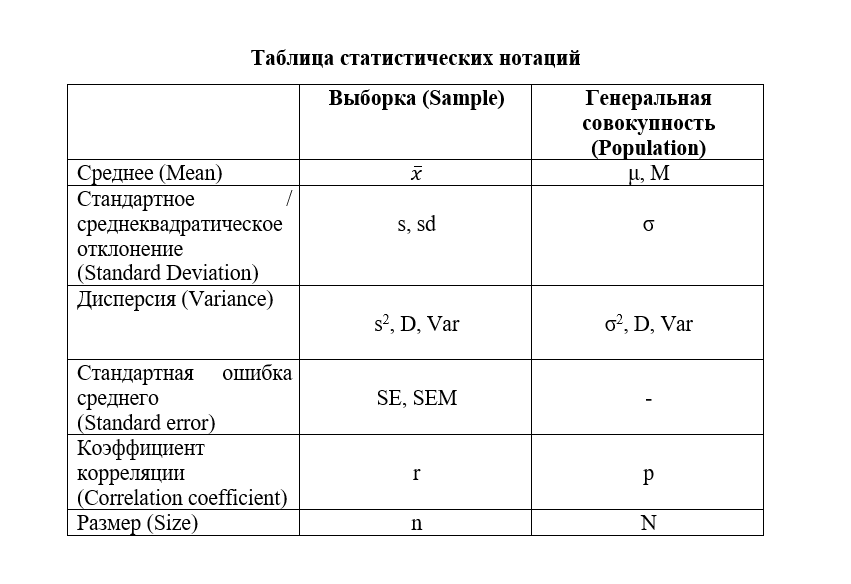

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Генеральная совокупность и выборка 

**Генеральная совокупность (population)** - это множество, на которое мы обобщаем наше исследование. Чаще всего исследовать всю генеральную совокупность нельзя, поэтому используется *выборка*.  

**Выборка (sample)** - это часть генеральной совокупности.  

* *Простая случайная выборка (simple random sample)* - из всей генеральной совокупности выбираются случайные элементы. 
* *Стратифицированная выборка (stratified sample)* - генеральная выборка делится на части по какому-либо признаку и внутри страт происходит случайная выборка элементов. 
* *Групповая выборка (cluster sample)* - генеральная выборка делится на +- равноценные части, для исследования выбираются какие-то кластеры и уже внутри этих кластеров происходит случайная выборка элементов. 

N - size of a population.  
n - size of a sample.

## Типы переменных 

**Переменные (variables)** - различные характеристики, которые мы собственно исследуем. 

**NB! Population has parameters, sample has statistics.**  



Виды переменных: 

**Количественные (quantitative/continuous)**
* Непрерывные (ratio/interval) - любое значение из промежутка
* Дискретные (discrete) - только определенные значения

**Номинативные (qualitative/categorical)** 
* Ранговые (ordinal) - упорядоченные значения
* Номинальные (nominal) = равноправные значения
* Binary - 'yes/no' type of data

In [17]:
data = [['Kate', 14, 1, 'first'], 
        ['Mary', 16, 0, 'second'], 
        ['Loius', 19, 2, 'third']]
header = ['name', 'age', 'n of siblings', 'place in a race']
df = pd.DataFrame(data, columns=header)

df  

,name,age,n of siblings,place in a race
0,Kate,14,1,first
1,Mary,16,0,second
2,Loius,19,2,third


name - nominal   
age - interval  
n of siblings - discrete   
place in a race - ordinal  

## Центральная тенденция (Central Tendency) 

In [3]:
med_link = 'https://raw.githubusercontent.com/quicksilverri/statistics/main/medical_examination.csv'

med = pd.read_csv(med_link, index_col=0)

med.sample(5)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
70732,23133,1,169,78.0,120,80,1,1,0,0,0,1
37981,19640,2,160,60.0,120,80,1,1,0,0,1,0
17067,15795,2,160,52.0,70,40,1,1,1,0,1,0
83316,15098,1,151,83.0,110,70,1,1,0,0,1,0
78433,16781,2,161,63.0,100,70,1,1,1,0,1,0


In [4]:
sample = med.sample(1000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


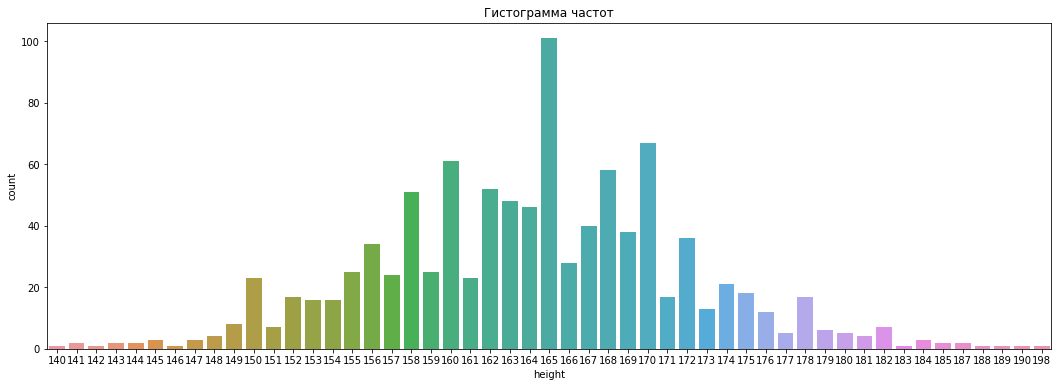

In [ ]:
plt.figure(figsize=(18, 6))
plt.title('Гистограмма частот')
sns.countplot(sample.height)

Вот эта штука - это гистограмма частот. По ней уже можно увидеть всякие интересные закономерности и примерно прикинуть, где "среднее" значение.

**Виды среднего:**


In [ ]:
sample.height.mean()

164.122

In [ ]:
sample.height.median()

165.0

In [ ]:
sample.height.mode()

0    165
dtype: int64

## Изменчивость (deviation) 


Самая простая, но при этом и подверженая влиянию выбросов мера - **размах (range)**  
Еще есть **mid-range** - среднее арифметическое самого большого и самого маленького числа

In [28]:
range = sample.height.max() - sample.height.min()
range

53

In [27]:
mid_range = (sample.height.max() + sample.height.min()) / 2
mid_range

163.5

**Дисперсия (variance)** - средний квадрат отклонений индивидуальных значений признака от их средней величины.  
Дисперсия не очень отражает то, насколько реально значения отличаются, к тому же имеет другую размерность. 

**Среднее квадратическое отклонение (standart deviation)** - корень из дисперсии.  

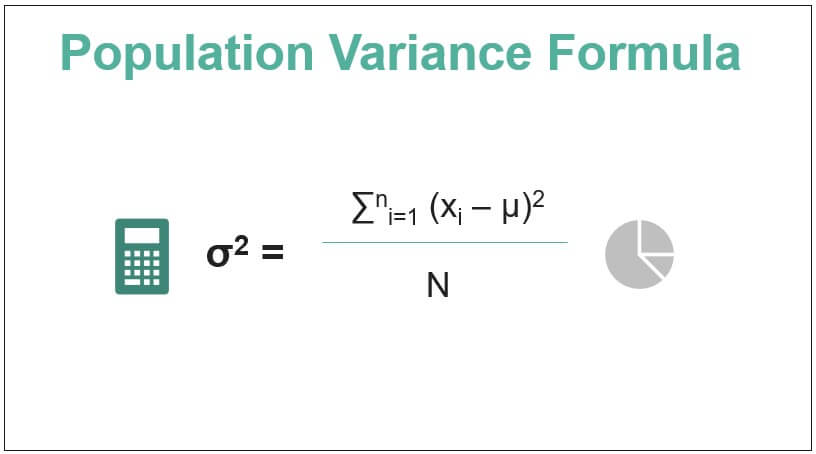

sample_variance.svg

Для выборки в знаменателе -1 (why? idk, practically it turned out to be a better representation for the population as a whole)

In [7]:
sample.height.var()

64.66105705705705

In [16]:
sample.height.var() 

78.4497137137139

In [14]:
sample.height.std(ddof=0) # for population

8.852754599558274

In [15]:
sample.height.std(ddof=1) # for sample

8.857184299409937

ddof = delta degrees of freedom 

**Межквартальный размах (interquartile range)** - это разница между 0.75 и 0.25 перцентилем.

In [11]:
iqr = sample.height.quantile(0.75) - sample.height.quantile(0.25)
iqr

11.0

Легко заметить, что медиана - это 0.5 перцентиль.

In [13]:
sample.height.median() == sample.height.quantile(0.5)

True

* Для датасетов без выбросов можно использовать среднее арифметическое + стандартное отклонение.  *symmetric distributions withoit outliers*  
* Если в датасете есть выбросы, то лучше использовать медиану и iqr - они менее подвержены влиянию супербольших и супермаленьких значений. *skewed distributions / data with outliers*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


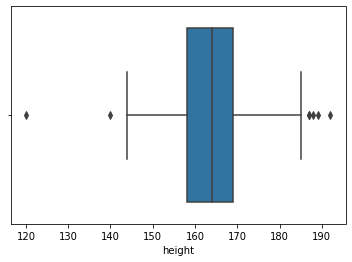

In [12]:
sns.boxplot(sample.height)

**Mean absolute deviation** - mean "distance" between a mean of a distribution and its values. 

In [29]:
sample.height.mad()

6.269569999999998

### Symmetric VS Skewed data

Distributions can be: 
* Symmetric
* Right skewed
* Left skewed

In [30]:
symmetric = pd.Series([1, 2, 3, 4, 4, 4, 3, 2, 1])
pos_skewed = pd.Series([1, 4, 4, 4, 4, 3, 2, 2, 1, 1, 1, 1, 1])
neg_skewed = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 4, 4, 1])

Text(0.5, 1.0, 'Negatively\\Right Skewed')

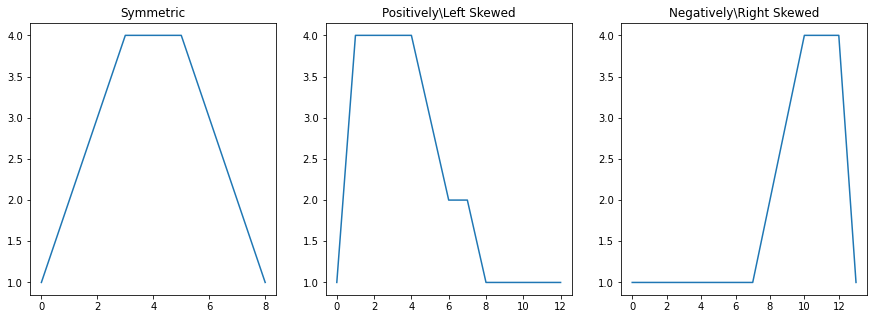

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

ax1.plot(symmetric)
ax1.set_title('Symmetric')

ax2.plot(pos_skewed)
ax2.set_title('Positively\Left Skewed')

ax3.plot(neg_skewed)
ax3.set_title('Negatively\Right Skewed')

Text(0.5, 1.0, 'Sample Weight Distribution')

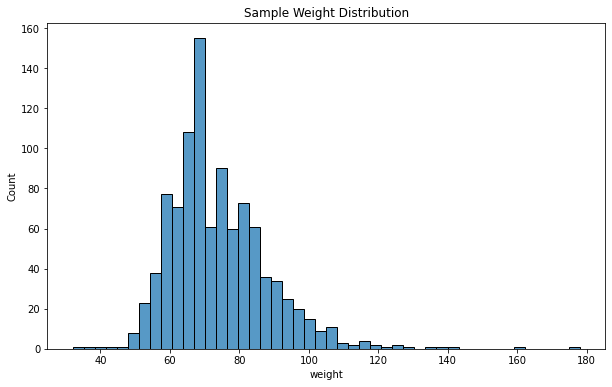

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(sample.weight)
plt.title('Sample Weight Distribution')

This one is *unimodal* (has only one mode) and *right-skewed* (its 'tail' is on the right side of the plot).

Depending on number of modes/peaks, distributions can be: 
* Unimodal
* Bimodal 
* Multimodal
* Uniform

## Percentiles 

Two ways of thinking:  
1. % of the data that is **below** the amount   
2. % of the data that is **at or below** the amount  

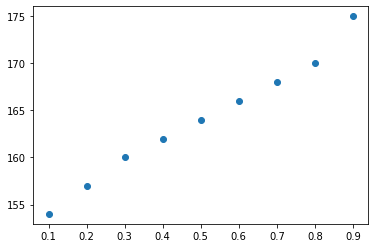

In [13]:
index = [round(0.1 * i, 2) for i in range(1, 10)]
data = [sample.height.quantile(x) for x in index]

percentiles = pd.Series(data, index=map(str, index))
percentiles.plot(style='o')

## Z-score 

Measures how many standart deviations above or below the mean a data point is. 

* positive z-score = data point is above average 
* negative z-score = data point is below average 
* 0 z-score = data point is close to average

In [19]:
df['age z-score'] = (df.age - df.age.mean()) / df.age.std(ddof=0)

df

,name,age,n of siblings,place in a race,age z-score
0,Kate,14,1,first,-1.135550
1,Mary,16,0,second,-0.162221
2,Loius,19,2,third,1.297771


## Linear transformations

* If you add a constant to data:  
 - measures of mean change by the constant  
 - measures of spread stay the same  
* If you multiply data by a constant: 
 - **both** measures of mean and measures of spread increase by constant times 

In [30]:
constant = 10
height_plus = sample.height + constant
height_mult = sample.height * constant 

index = ['plain data', '+ C', '* C']
cols = ['mean', 'std']

In [31]:
transformations = pd.DataFrame(
    [
     [sample.height.mean(), sample.height.std(ddof=0)], 
     [height_plus.mean(), height_plus.std(ddof=0)], 
     [height_mult.mean(), height_mult.std(ddof=0)]
    ], 
    index=index, 
    columns=cols,
)

print(f'constant = {constant}')
transformations

constant = 10


,mean,std
plain data,164.144,8.852755
+ C,174.144,8.852755
* C,1641.440,88.527546
